<a href="https://colab.research.google.com/github/Nikithagomez/NG/blob/main/MarketinganalysisBFSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #from sklearn library importing train-test-spit function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #to evaluate our model's performance
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE

import six
import sys
sys.modules['Sklearn.externals.six']=six


In [ ]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_Data.csv') #test data

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.7+ MB


In [ ]:
train.shape

(36168, 17)

In [ ]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.840743,1287.631166,16.173330,255.643995,2.931459,22.493890,0.318652
std,9.651947,2905.161234,8.525741,260.655720,3.345965,74.662548,2.013822
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,52.000000,8.000000,100.000000,1.000000,-1.000000,0.000000
50%,39.000000,409.000000,17.000000,175.000000,2.000000,-1.000000,0.000000
75%,48.000000,1330.000000,22.000000,313.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,4918.000000,63.000000,371.000000,275.000000


**EXPLORATORY DATA ANALYSIS**

In [ ]:
#finding featured with null values
train.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no features with null values

**Finding features with atleast one value**

In [ ]:
for column in train.columns:
    print(column,train[column].nunique())

age 70
job 12
marital 3
education 4
default 2
balance 6656
housing 2
loan 2
contact 3
day 31
month 11
duration 1511
campaign 48
pdays 339
previous 34
poutcome 4
y 2


There are no features with one value

**Univariate analysis of target 'y'**

In [ ]:
train['y'].value_counts() #finding the number of subscriptions 


no     33735
yes     2433
Name: y, dtype: int64

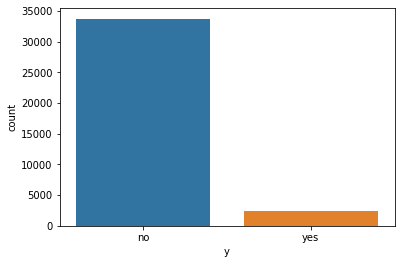

In [ ]:
sns.countplot(data=train, x='y') #plot of number of subscriptions


**Explore the Numerical Features**



In [ ]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if ((train[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


There are **7** numerical features namely age, balance,day ,duration,campaign,pdays and previous

**Finding discrete variables if any**

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


There are no discrete variables. 

**Distribution of continous numerical features**

In [ ]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


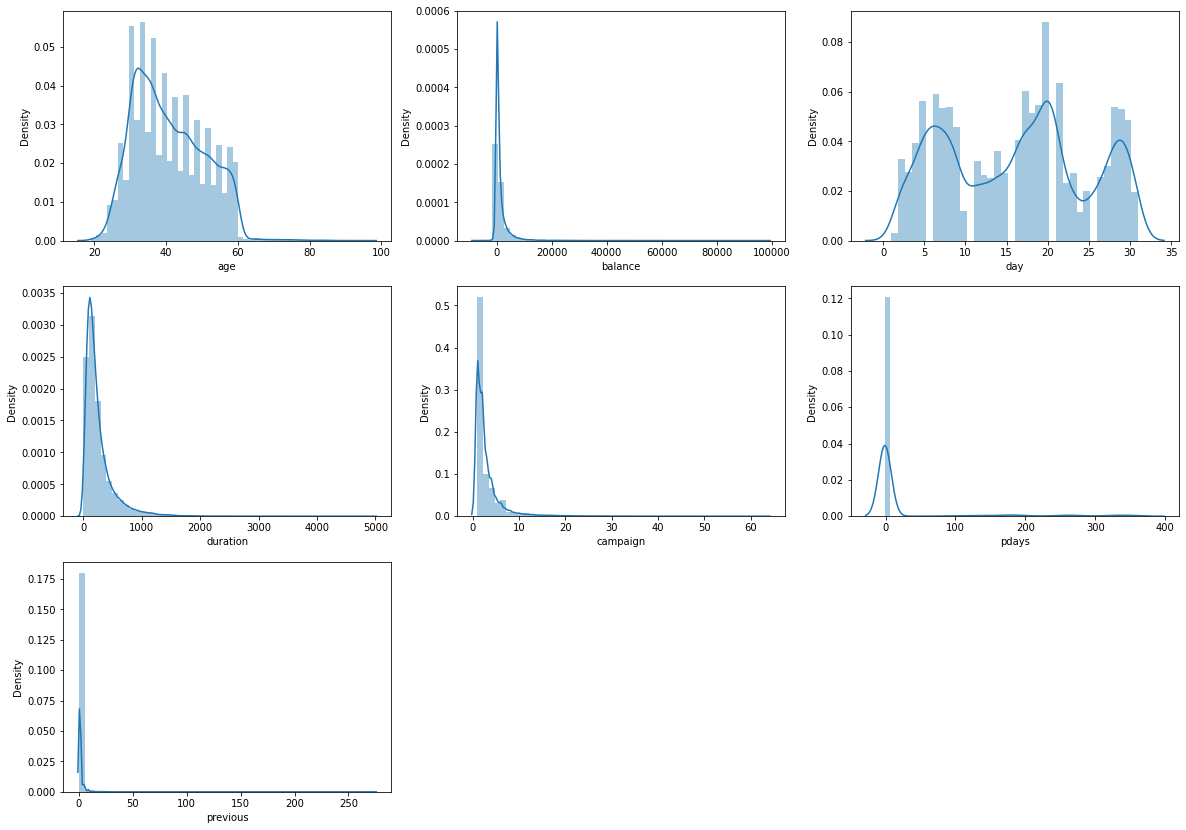

In [ ]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(train[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

Inference :It seems age, days distributed normally.
Balance, duration, compaign, pdays and previous are heavely skewed towards left and seems to be have some outliers.

**Relation between Continous numerical Features and Target**



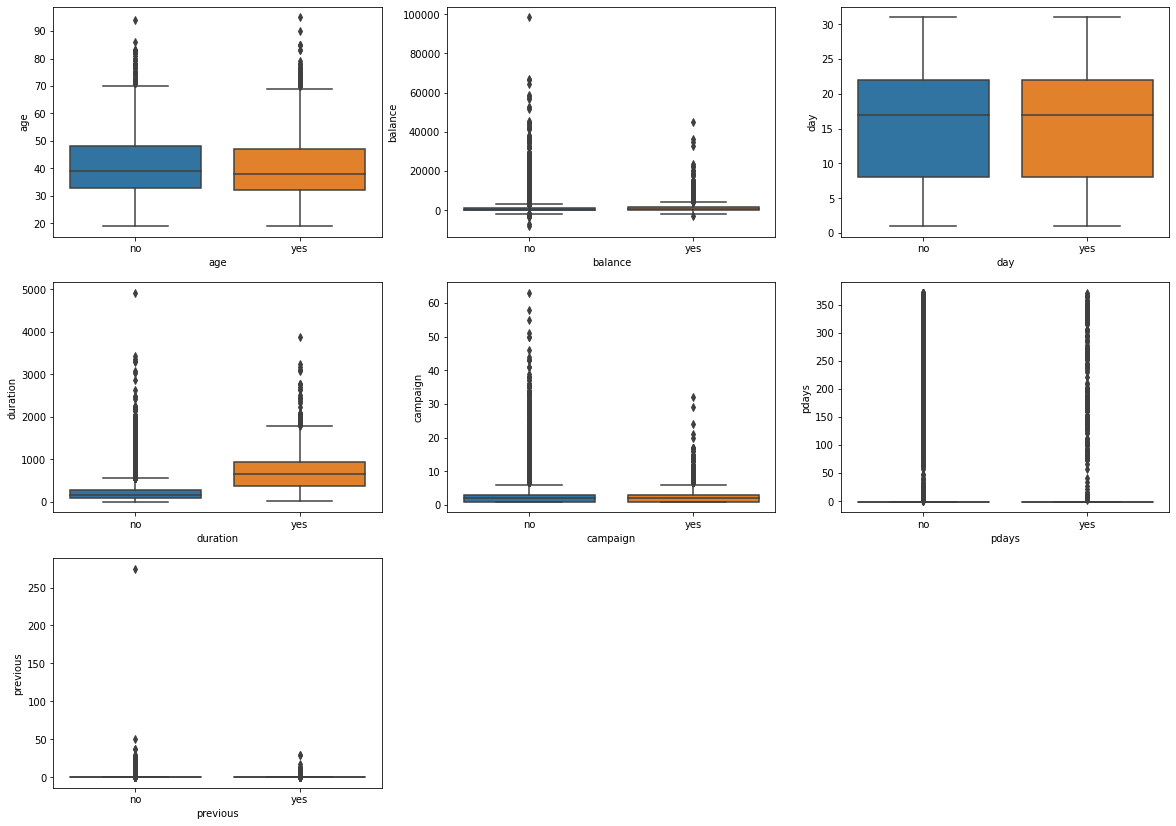

In [ ]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='y', y= train[feature], data=train)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

**Find Outliers in numerical features**



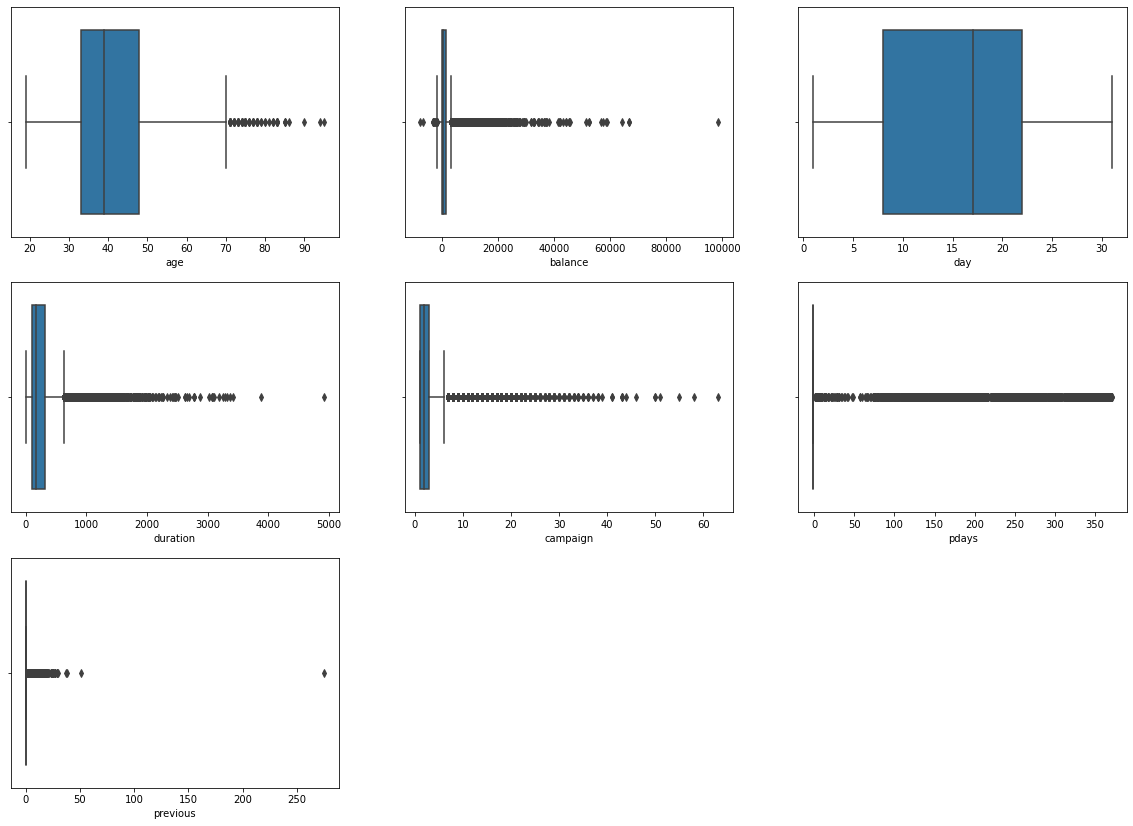

In [ ]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(train[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Inference : age, balance, duration, campaign, pdays and previous has some outliers


[link text](https://)**Explore the correlation between numerical features**


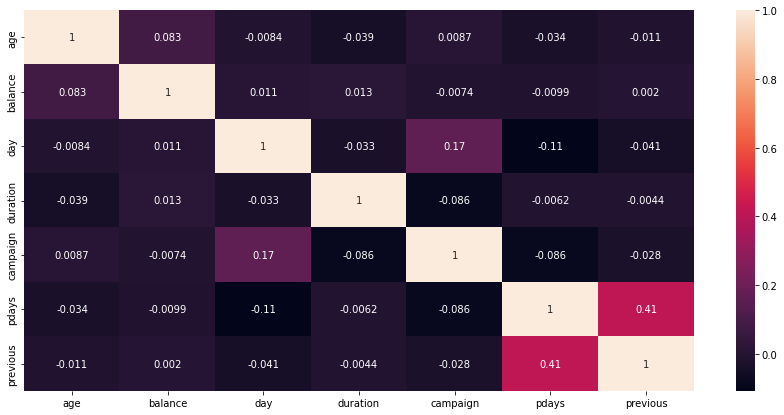

In [ ]:
## Checking for correlation
cor_mat=train.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

It seems no feature is heavily correlated with other features


**Explore the Categorical Features**



In [ ]:
categorical_features=[feature for feature in train.columns if ((train[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features



['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

*There are 9 categorical features as listed above*

**Finding number of categories in each feature**

In [ ]:
  for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))


The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 11
The feature is poutcome and number of categories are 4


*Feature 'job' and 'month' has highest number of categorical values*


**Find the categorical feature distribution**

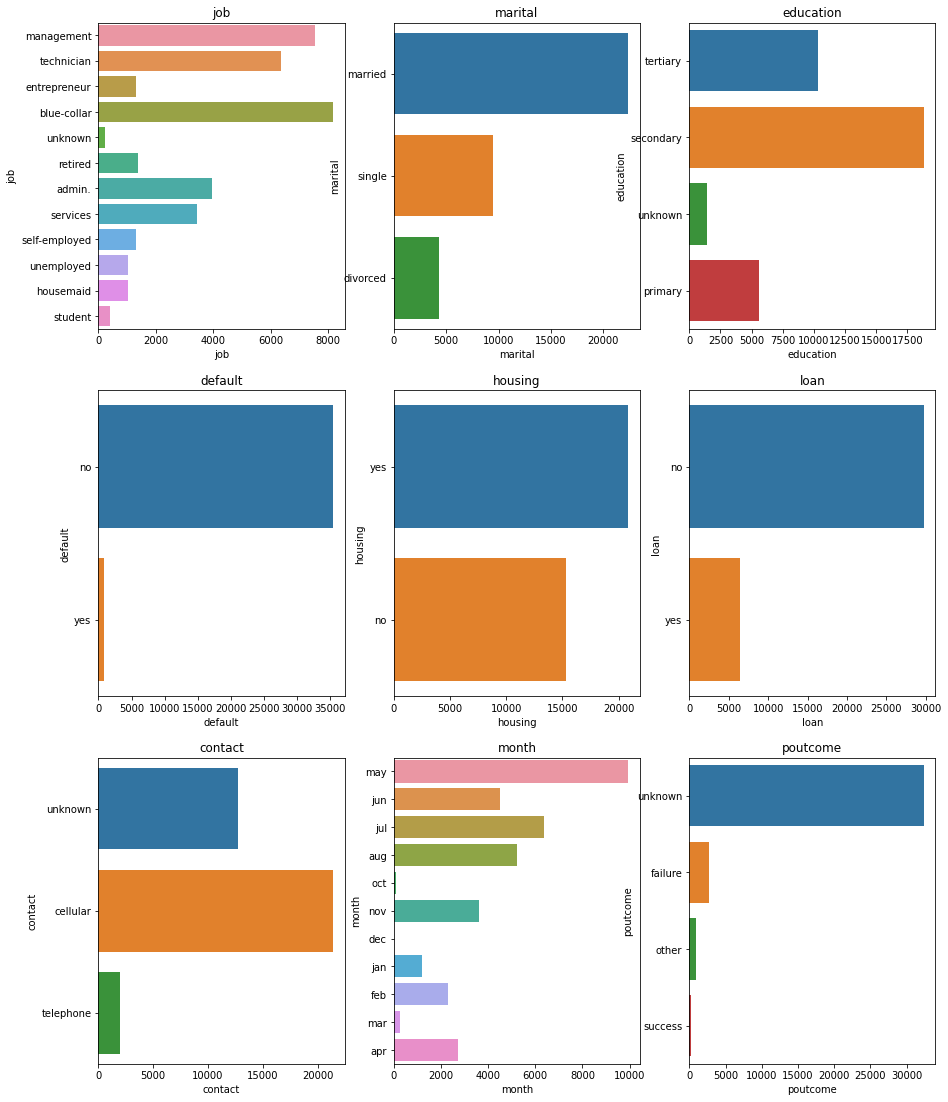

In [ ]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=train)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show() 

Inference:

*   client with job type as bluecollar and management records are high in given dataset and housemaid,student are very less
 

*   client who married are high in records in given dataset and divorced are less


*  client whoes education background is secondary are in high 
  

*   default feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
 
*  data in month of may is high and less in dec





**Relationship between target 'y'and categorical variables**

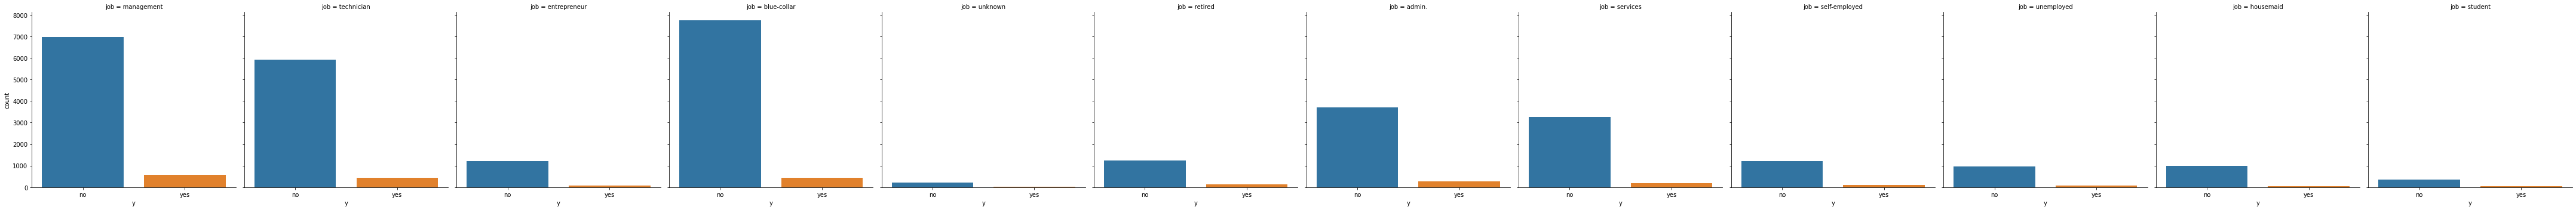

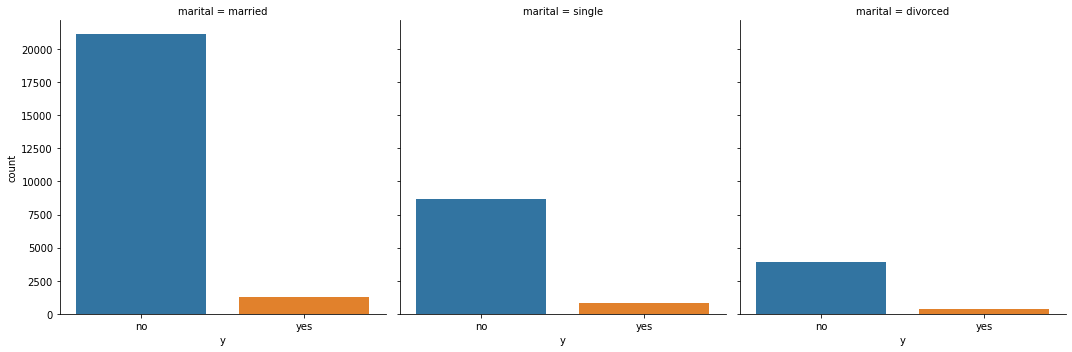

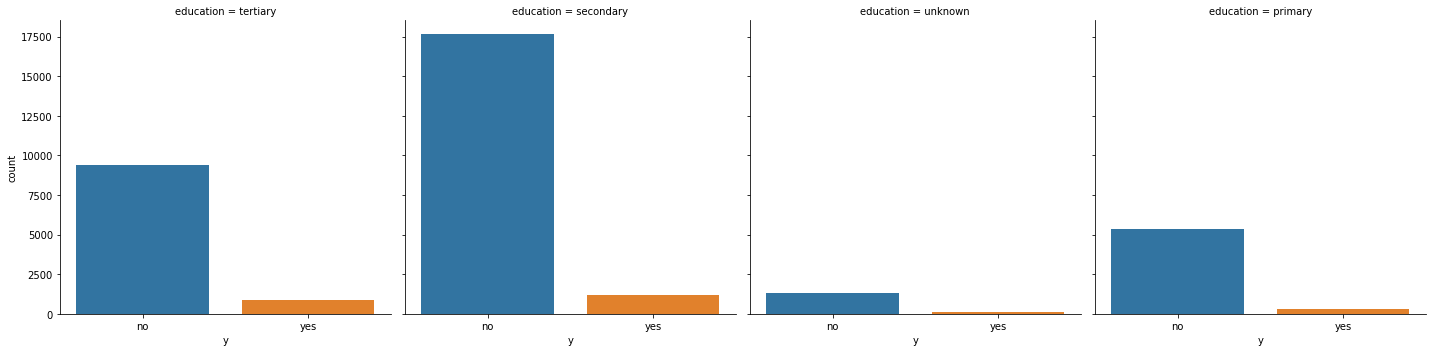

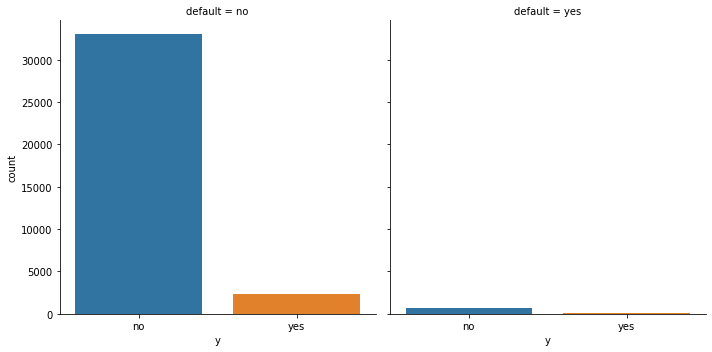

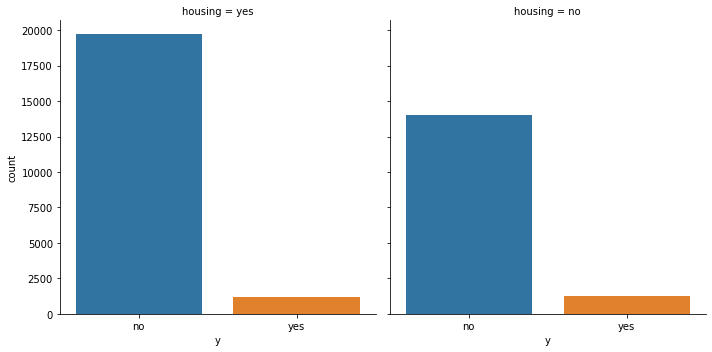

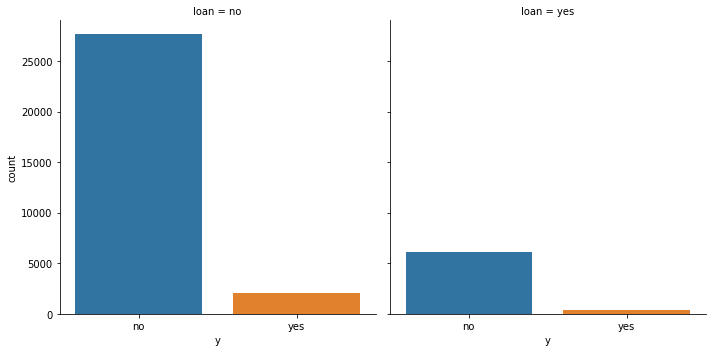

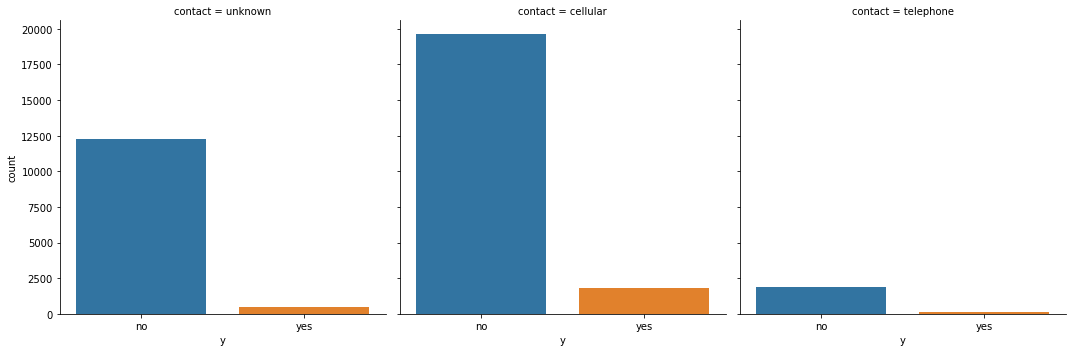

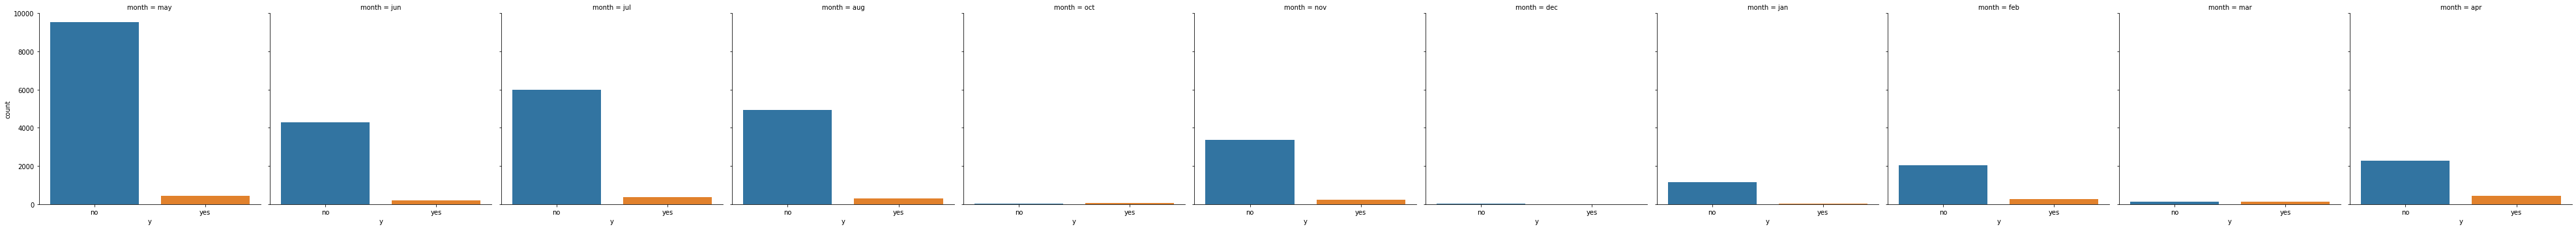

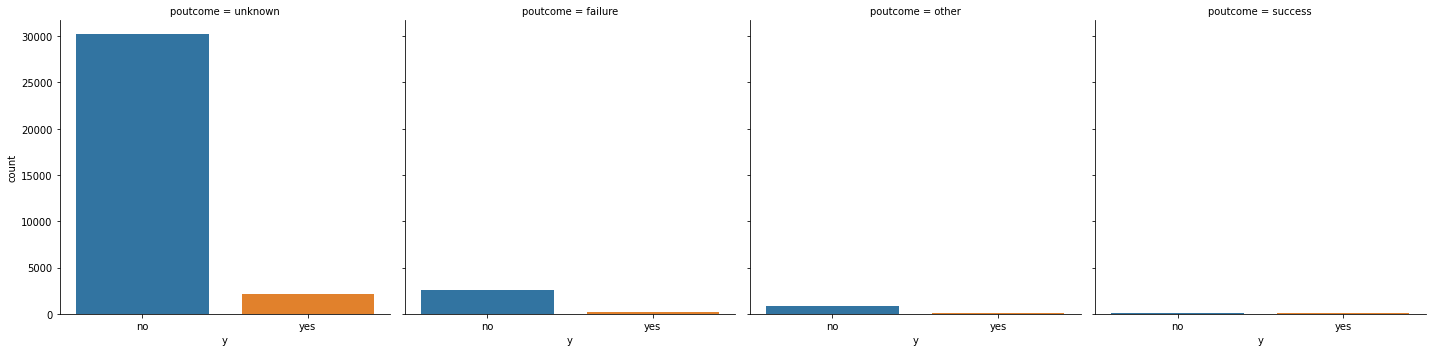

In [ ]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= train)
plt.show()


**Check the counts of target variable split over each categorical variable**

In [ ]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(train.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           3692
     blue-collar      7736
     entrepreneur     1218
     housemaid         985
     management       6969
     retired          1227
     self-employed    1206
     services         3263
     student           355
     technician       5917
     unemployed        955
     unknown           212
yes  admin.            275
     blue-collar       430
     entrepreneur       78
     housemaid          46
     management        588
     retired           140
     self-employed      99
     services          181
     student            61
     technician        431
     unemployed         87
     unknown            17
dtype: int64
y    marital 
no   divorced     3951
     married     21116
     single       8668
yes  divorced      334
     married      1273
     single        826
dtype: int64
y    education
no   primary       5327
     secondary    17643
     tertiary      9425
     unknown       1340
yes  primary        300
     secondary     1

Inference:

1.   blue collar, admin, management, retired clients has high interest on deposit
2. Married clients shows high interest on deposit
3.   client who has housing loan seems to be not interested much on deposit
4. clients who have secondary education need to be more responsive
3.   if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
4.    months of April,may, June,july client show high interest to deposit
5. Cellular communications seems to be more responsive












**FEATURE ENGINEERING**

**Removing the unwanted features**

In [ ]:
df2=train.copy()

In [ ]:
tdf2=test.copy()

In [ ]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df2.shape

(36168, 17)

In [ ]:
tdf2.shape

(9043, 17)

**'default'** feature doesnot play an important role. it can be removed

In [ ]:
df2.groupby(['y','default']).size()

y    default
no   no         33007
     yes          728
yes  no          2386
     yes           47
dtype: int64

In [ ]:
df2.drop(['default'],axis=1,inplace=True)

In [ ]:
tdf2.drop(['default'],axis=1,inplace=True)

In [ ]:
df2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
tdf2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,blue-collar,single,secondary,41,yes,no,cellular,11,may,14,5,-1,0,unknown,NaN
1,40,blue-collar,married,secondary,1844,yes,no,cellular,11,may,231,1,-1,0,unknown,NaN
2,40,blue-collar,married,primary,98,yes,no,cellular,11,may,240,2,343,5,failure,NaN
3,49,blue-collar,divorced,primary,24,yes,no,cellular,11,may,701,1,362,1,success,NaN
4,33,blue-collar,married,secondary,358,no,no,cellular,11,may,231,1,350,1,failure,NaN


**'default'**column has been removed

In [ ]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       30194
      1           3
      2          34
      4           1
      5          11
              ...  
yes   363         1
      364         1
      366         1
      367         1
      370         1
Length: 500, dtype: int64

Drop pdays as it has value -1 for around 40%

In [ ]:
df2.drop(['pdays'],axis=1,inplace=True)

In [ ]:
df2.shape

(36168, 15)

In [ ]:
tdf2.drop(['pdays'],axis=1,inplace=True)

In [ ]:
tdf2.shape

(9043, 15)

 The **pdays** has been removed

In [ ]:
df2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,0,unknown,no


**Removing outliers**

Removing outliers from 'campaign'

In [ ]:
df2.groupby(['y','campaign']).size()

y    campaign
no   1           12095
     2            9516
     3            4204
     4            2824
     5            1373
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Length: 70, dtype: int64

In [ ]:
df2.groupby(['y','campaign'],sort=True)['campaign'].count()


y    campaign
no   1           12095
     2            9516
     3            4204
     4            2824
     5            1373
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [ ]:
df3 = df2[df2['campaign'] < 33] #removing outliers from campaign


In [ ]:
tdf3 = tdf2[tdf2['campaign'] < 33] #removing outliers from campaign


Removing outliers from feature 'previous'

In [ ]:
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           30156
     1            1272
     2             977
     3             447
     4             296
     5             166
     6              83
     7              75
     8              49
     9              41
     10             13
     11             22
     12             18
     13             14
     14              9
     15             13
     16              6
     17              4
     18              4
     19              3
     20              5
     21              2
     22              1
     23              4
     24              3
     25              3
     26              1
     27              4
     29              2
     37              1
     38              1
     51              1
     275             1
yes  0            2156
     1             112
     2              66
     3              37
     4              17
     5              13
     6              13
     7               7
     8               3
     9              

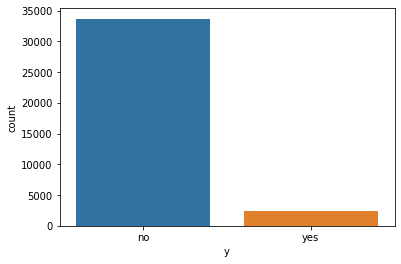

In [ ]:
sns.countplot(x='y',data=df3)

**Given dataset is highly unbalanced**

In [ ]:
df3['y'].replace('no', 0,inplace=True)
df3['y'].replace('yes', 1,inplace=True)


In [ ]:
tdf3['y'].replace('no', 0,inplace=True)
tdf3['y'].replace('yes', 1,inplace=True)

In [ ]:
df3 = pd.get_dummies(df3)
df3


,age,balance,day,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,137,11,214,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
36164,54,1252,11,101,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
36165,40,-17,11,474,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
36166,45,-72,11,306,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
tdf3 = pd.get_dummies(tdf3)


In [ ]:
tdf3.shape

(9043, 49)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36130 entries, 0 to 36167
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  36130 non-null  int64
 1   balance              36130 non-null  int64
 2   day                  36130 non-null  int64
 3   duration             36130 non-null  int64
 4   campaign             36130 non-null  int64
 5   previous             36130 non-null  int64
 6   y                    36130 non-null  int64
 7   job_admin.           36130 non-null  uint8
 8   job_blue-collar      36130 non-null  uint8
 9   job_entrepreneur     36130 non-null  uint8
 10  job_housemaid        36130 non-null  uint8
 11  job_management       36130 non-null  uint8
 12  job_retired          36130 non-null  uint8
 13  job_self-employed    36130 non-null  uint8
 14  job_services         36130 non-null  uint8
 15  job_student          36130 non-null  uint8
 16  job_technician       3

In [ ]:
tdf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9043 entries, 0 to 9042
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9043 non-null   int64  
 1   balance              9043 non-null   int64  
 2   day                  9043 non-null   int64  
 3   duration             9043 non-null   int64  
 4   campaign             9043 non-null   int64  
 5   previous             9043 non-null   int64  
 6   y                    0 non-null      float64
 7   job_admin.           9043 non-null   uint8  
 8   job_blue-collar      9043 non-null   uint8  
 9   job_entrepreneur     9043 non-null   uint8  
 10  job_housemaid        9043 non-null   uint8  
 11  job_management       9043 non-null   uint8  
 12  job_retired          9043 non-null   uint8  
 13  job_self-employed    9043 non-null   uint8  
 14  job_services         9043 non-null   uint8  
 15  job_student          9043 non-null   u

In [ ]:
tdf3.drop(['month_sep'],axis=1,inplace=True)

In [ ]:
tdf3.shape

(9043, 48)

In [ ]:
df3.shape

(36130, 48)

In [ ]:
y = df3['y']
X = df3.drop('y', axis=1)


In [ ]:
y1= tdf3['y']
X1 = tdf3.drop('y', axis=1)


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
36163    0
36164    0
36165    1
36166    0
36167    0
Name: y, Length: 36130, dtype: int64

In [ ]:
X

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,137,11,214,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
36164,54,1252,11,101,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
36165,40,-17,11,474,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
36166,45,-72,11,306,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


Since the data is unbalanced, **Smote Analysis** needs to be performed

In [ ]:
!pip install -U imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
from sklearn.model_selection import train_test_split

**Logistic regression**

In [ ]:
model = LogisticRegression() #creating an object of logistic regression model

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote=SMOTE()

In [ ]:
X, y = smote.fit_resample(X,y)


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_scores = model.predict(x_val)



In [ ]:
y_values = model.predict(X1)
y_values #prediction using logistic regression on the given test data


array([0, 0, 0, ..., 0, 0, 0])

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6729
           1       0.61      0.20      0.30       497

    accuracy                           0.94      7226
   macro avg       0.78      0.60      0.64      7226
weighted avg       0.92      0.94      0.92      7226

ROC_AUC_SCORE is 0.5967798169609125


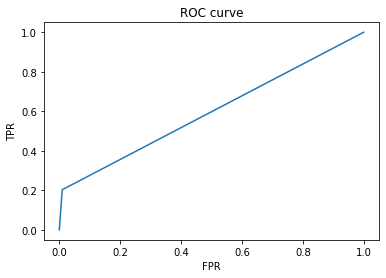

In [ ]:
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


**Decision Tree Classifier**

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6729
           1       0.42      0.46      0.44       497

    accuracy                           0.92      7226
   macro avg       0.69      0.71      0.70      7226
weighted avg       0.92      0.92      0.92      7226

ROC_AUC_SCORE is 0.7071990570260618


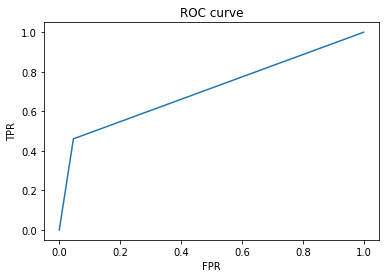

In [ ]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


In [ ]:
y_values = model.predict(X1)


In [ ]:
y_values    #prediction using decision tree on the given test data

array([0, 0, 0, ..., 0, 0, 0])

**Random Forest Classifier**

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6729
           1       0.64      0.28      0.39       497

    accuracy                           0.94      7226
   macro avg       0.79      0.63      0.68      7226
weighted avg       0.93      0.94      0.93      7226

ROC_AUC_SCORE is 0.6330371888037992


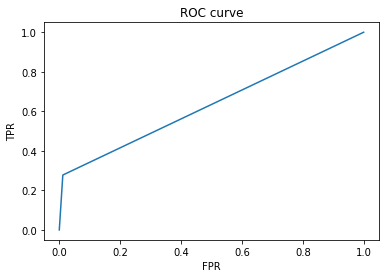

In [ ]:
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


In [ ]:
y_values = model.predict(X1)


In [ ]:
(y_values)                    #prediction for the given test dataset using Random forest

array([0, 0, 0, ..., 1, 0, 0])

**Gradient Boosting Classifier**

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6729
           1       0.60      0.36      0.45       497

    accuracy                           0.94      7226
   macro avg       0.78      0.67      0.71      7226
weighted avg       0.93      0.94      0.93      7226

ROC_AUC_SCORE is 0.6713124638752413


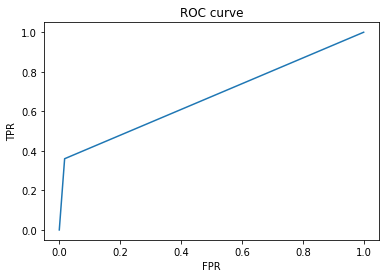

In [ ]:
model = GradientBoostingClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


In [ ]:
y_values = model.predict(X1)


In [ ]:
y_values                    #prediction for the given test dataset using GBM

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
submissions = pd.DataFrame()
submissions= X1
submissions['y'] = y_values
print (submissions)

      age  balance  day  duration  campaign  previous  job_admin.  \
0      35       41   11        14         5         0           0   
1      40     1844   11       231         1         0           0   
2      40       98   11       240         2         5           0   
3      49       24   11       701         1         1           0   
4      33      358   11       231         1         1           0   
...   ...      ...  ...       ...       ...       ...         ...   
9038   51      825   17       977         3         0           0   
9039   71     1729   17       456         2         0           0   
9040   72     5715   17      1127         5         3           0   
9041   57      668   17       508         4         0           0   
9042   37     2971   17       361         2        11           0   

      job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0                   1                 0              0  ...          0   
1                   1  

In [ ]:
submissions['y']


0       0
1       0
2       0
3       1
4       0
       ..
9038    1
9039    1
9040    1
9041    0
9042    0
Name: y, Length: 9043, dtype: int64

In [ ]:
submissions['y'].replace(0,'no',inplace=True)
submissions['y'].replace(1,'yes',inplace=True)

In [ ]:
submissions


,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,35,41,11,14,5,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,no
1,40,1844,11,231,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,no
2,40,98,11,240,2,5,0,1,0,0,...,0,0,1,0,0,1,0,0,0,no
3,49,24,11,701,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,yes
4,33,358,11,231,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,51,825,17,977,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,yes
9039,71,1729,17,456,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,yes
9040,72,5715,17,1127,5,3,0,0,0,0,...,0,0,0,1,0,0,0,1,0,yes
9041,57,668,17,508,4,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,no


In [ ]:
submissions.to_csv(r'/content/drive/MyDrive/colab datasets/submissions.csv', header=True, index=False)


**XGB Classifier**

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6729
           1       0.61      0.31      0.41       497

    accuracy                           0.94      7226
   macro avg       0.78      0.65      0.69      7226
weighted avg       0.93      0.94      0.93      7226

ROC_AUC_SCORE is 0.6495854305503104


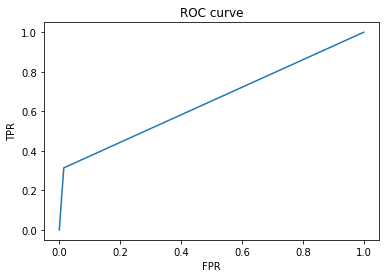

In [ ]:
model = XGBClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


In [ ]:
y_values                    #prediction for the given test dataset using XGB

array([0, 0, 0, ..., 1, 0, 0])

**Conclusion**
1.For our business problem, we wanted to predict the term subscription based on a campaign so it is vital to have a high recall to have higher revenue. For that, it is important to choose a model with better recall and less false negatives, hence we choose the Logistic Model to better classify the customer term deposit prediction.

2.For every false positive the bank will be spending money and investing in other revenue-generating sources. On the other hand, the bank will lose its customer trust and the possibility of losing the customer when the resources would also have been utilized.

3.For every false negative the bank has the possibility of losing out a potential customer.

4.For the marketing campaign, its very important for the bank to get in more customers to subscribe for the term deposit so that the bank can get more revenue, if in this case, the bank starts to lose out on customers in other words the bank would not want customer churn as a result of the output of the marketing campaign. So, it's important to have less False Negatives.